In [2]:
import logging
from AEMET import AEMETClient

app_logger = logging.getLogger("myproject.locality")
app_logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s %(name)s %(levelname)s: %(message)s")
handler.setFormatter(formatter)
app_logger.addHandler(handler)

aemet = AEMETClient(app_logger)
localities = aemet.get_localities()

2025-10-20 21:52:08,503 myproject.locality DEBUG: LocalityGraph created with 8122 nodes
2025-10-20 21:52:08,505 myproject.locality DEBUG: Building graph with BallTree (sklearn) with max_km=10.00
2025-10-20 21:52:09,797 myproject.locality INFO: Graph built: 8122 nodes, 32029 edges


Isolated nodes: ['id27001', 'id10004', 'id04003', 'id36020', 'id03002', 'id02003', 'id06006', 'id11001', 'id23003', 'id13008', 'id35020', 'id10013', 'id10011', 'id23004', 'id11003', 'id10018', 'id33001', 'id33002', 'id41009', 'id02009', 'id29011', 'id21006', 'id02010', 'id13017', 'id13903', 'id21008', 'id02011', 'id06015', 'id25039', 'id02015', 'id32011', 'id29023', 'id11901', 'id02017', 'id02019', 'id13024', 'id30012', 'id27008', 'id06023', 'id21015', 'id41020', 'id33008', 'id24029', 'id21016', 'id30013', 'id21017', 'id22072', 'id41022', 'id24036', 'id33011', 'id15018', 'id04032', 'id14016', 'id41024', 'id06033', 'id50077', 'id13033', 'id11013', 'id41031', 'id18046', 'id02025', 'id21023', 'id51001', 'id32029', 'id06042', 'id02029', 'id04037', 'id07015', 'id06037', 'id11014', 'id14020', 'id41033', 'id41035', 'id41036', 'id46099', 'id13036', 'id27015', 'id15032', 'id14021', 'id18056', 'id13039', 'id07026', 'id50095', 'id02030', 'id21031', 'id14026', 'id29051', 'id07022', 'id22109', 'id2

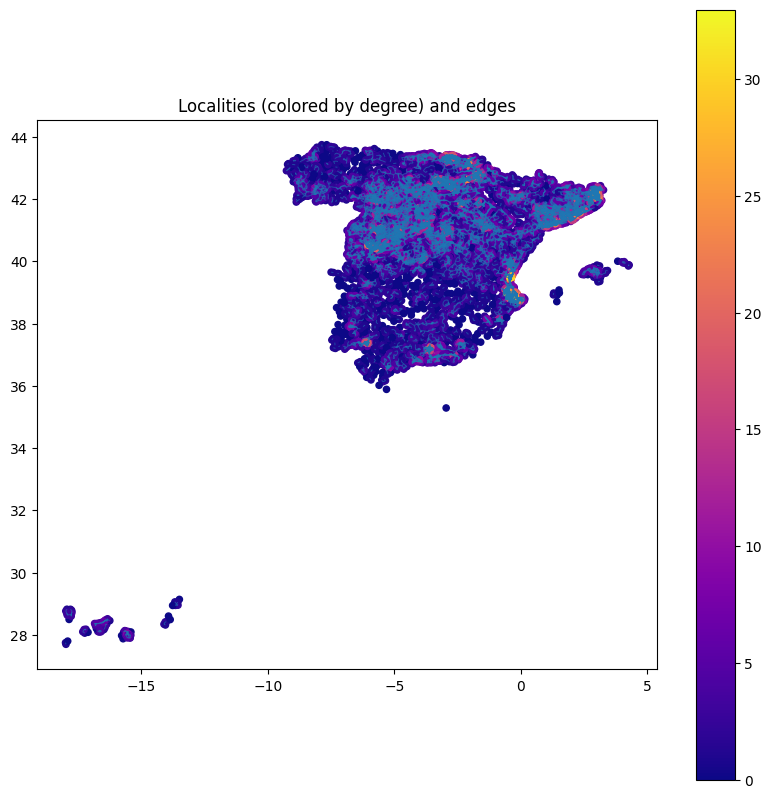

In [ ]:
from data.LocationGraph import LocationGraph

# localities: list of dicts (one example per locality)
lg = LocationGraph.from_list(localities, app_logger)
# build graph with 10 km threshold
lg.build_graph(max_km=10.0)

# quick QC
print("Isolated nodes:", lg.isolated_nodes())
print("Degree stats:", lg.degree_stats())

# static plot (matplotlib)
lg.geopandas_qc_plot()

# interactive map (folium)
#m = lg.folium_map(start_zoom=6)
#m.save("localities_graph.html")


In [4]:
stations = aemet.get_stations()

2025-10-20 21:53:25,114 myproject.locality DEBUG: LocalityGraph created with 947 nodes
2025-10-20 21:53:25,116 myproject.locality DEBUG: Building graph with BallTree (sklearn) with max_km=50.00


2025-10-20 21:53:25,291 myproject.locality INFO: Graph built: 947 nodes, 6410 edges


Isolated nodes: ['655', '712']
Degree stats: {'min': 0, 'max': 42, 'mean': 13.537486800422386, 'median': 11.0}


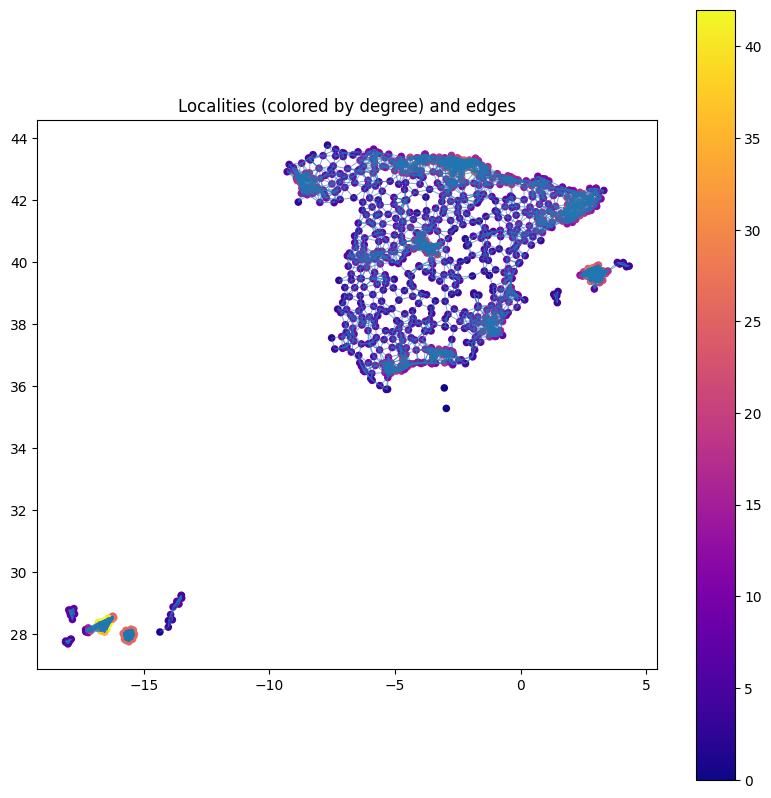

: 

In [ ]:
# localities: list of dicts you provided (one example per locality)
sg = LocationGraph.from_list(stations, app_logger)
# build graph with 10 km threshold (uses BallTree if sklearn installed)
sg.build_graph(max_km=50)

# quick QC
print("Isolated nodes:", sg.isolated_nodes())
print("Degree stats:", sg.degree_stats())

# static plot (matplotlib)
sg.geopandas_qc_plot()

# interactive map (folium)
#m = lg.folium_map(start_zoom=6)
#m.save("localities_graph.html")
